In [15]:
"""Pandas is a Python package designed to do work with “labeled” and “relational” data simple and intuitive.
   Pandas is a perfect tool for data wrangling.
   It designed for quick and easy data manipulation, aggregation, and visualization.
"""
import pandas as pd
"""The most fundamental package, around which the scientific computation stack is built, is NumPy 
   (stands for Numerical Python).
   It provides an abundance of useful features for operations on n-arrays and matrices in Python.
"""
import numpy as np
"""
Python Library that is tailored for the generation of simple and powerful visualizations with ease is Matplotlib.
"""
import matplotlib.pyplot as plt
"""
Seaborn is mostly focused on the visualization of statistical models;
such visualizations include heat maps,
those that summarize the data but still depict the overall distributions.
"""
import seaborn as sns
%matplotlib inline


In [16]:
data = pd.read_csv("googleplaystore.csv")#for loding .csv data we use read_csv
data.dropna(inplace=True)#removes all the rows with atleast one null value,inplace is like conformation


In [17]:
"""
data of Reviews has string M in it i stands for million
we have to remove the string "M" and "," from values and 
miltiply with 1000000 if the values has 'M' in it
finaly convert to int

this method can clean the Reviewa column 
"""
def filter(per):
    if "M" in str(per) and "," in str(per):
        per = str(per).replace("M","")
        per = per.replace(",","")
        return int(per)*1000000
    elif "M" in str(per):
        per = int(str(per).replace("M",""))
        return per*1000000
    elif "," in str(per):
        per = str(per).replace(",","")
        return int(per)
    
    else:  
        return int(per)

In [18]:
data["Reviews"] =data["Reviews"].apply(filter) # all the values of column 'Reviews' are passed to filter method

In [19]:
"""
this methd is used to clean "size" column
size column contains the strings like 
'M' stands for megabyte
"Varies with device"
"k" stands for kilobyte
we convert every app size to megabytes and return as float type
"""
def filter1(per):
    per = str(per)
    if "M" in per:
        per = per.replace("M","")
        return float(per)
    elif per == "Varies with device":
        return np.NaN
    elif "k" in per:
        return float(per.replace("k",""))/1000
    else:
        return float(per)


In [20]:
data["Size"]=data["Size"].apply(filter1) #used to apply filter1 function 

In [21]:
"""
thid function is used to clean instals column
it remones i]the string "+" and ","
and returns as intiger
"""
def filter2(per):
    per = str(per)
    if "+" in per:
        per = per.replace("+","")
    if "," in per:
        per = per.replace(",","")
        
    return int(per)

In [22]:
data["Installs"]=data["Installs"].apply(filter2)# used to apply filter2 function"

In [23]:
"""
used to remove the string "$"
and convert thr price to rupies as floats
"""
def filter3(per):
    per = str(per)
    if "$" in per:
        per=per.split("$")[1]
    return (float(per)*69.44)

In [24]:
data["Price"]=data["Price"].apply(filter3)# used to apply filter 3 function

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              7723 non-null float64
Installs          9360 non-null int64
Type              9360 non-null object
Price             9360 non-null float64
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 1023.8+ KB


In [12]:
"""
Finally, a word about Plotly.
It is rather a web-based toolbox for building visualizations,
exposing APIs to some programming languages (Python among them).
There is some robust, out-of-box graphics on the plot.ly website.
In order to use Plotly, you will need to set up your API key.
The graphics will be processed server side and will be posted on the internet,
but there is a way to avoid it.


"""

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf

C:\Users\WELCOME\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


C:\Users\WELCOME\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




C:\Users\WELCOME\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\WELCOME\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in greater

C:\Users\WELCOME\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in less

C:\Users\WELCOME\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\WELCOME\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\WELCOME\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning:

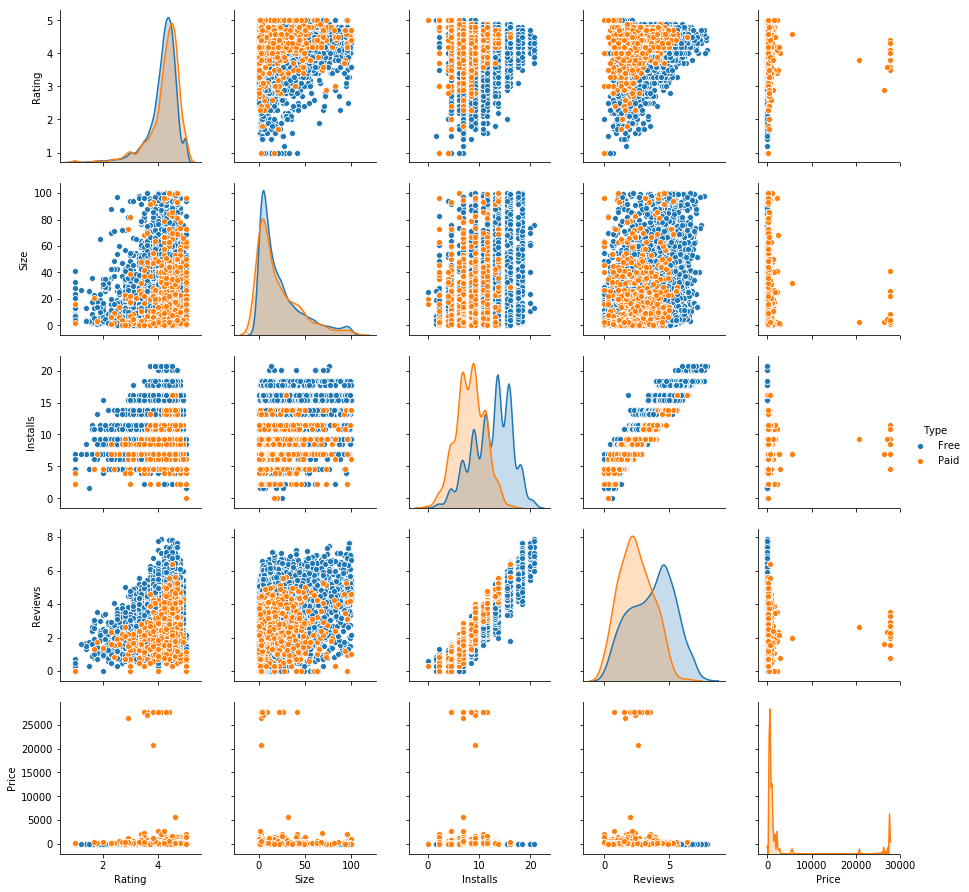

In [13]:
sns.pairplot(pd.DataFrame(list(zip(data["Rating"],data["Size"], np.log(data["Installs"]), np.log10(data["Reviews"]),data["Type"], data["Price"])), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type')

In [27]:
number_of_apps_in_category = data['Category'].value_counts().sort_values(ascending=True)

df = [go.Pie(labels = number_of_apps_in_category.index,values = number_of_apps_in_category.values,hoverinfo = 'label+value')]

plotly.offline.iplot(df, filename='active_category')


Family and Game apps have the highest market prevelance.
Interestingly, Tools, Business and Medical apps are also catching up.

In [15]:
df = [go.Histogram(
        x = data.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(data['Rating']))
plotly.offline.iplot(df, filename='overall_rating_distribution')

Average app rating =  4.191837606837612


Generally, most apps do well with an average rating of 4.17.

Let's break this down and inspect if we have categories which perform exceptionally good or bad

In [16]:
#print('Junk apps priced above 350$')
data[['Category', 'App',"Price"]][data.Price > 200*64]

,Category,App,Price
4197,FAMILY,most expensive app (H),27775.3056
4362,LIFESTYLE,💎 I'm rich,27775.3056
4367,LIFESTYLE,I'm Rich - Trump Edition,27776.0000
5351,LIFESTYLE,I am rich,27775.3056
5354,FAMILY,I am Rich Plus,27775.3056
5355,LIFESTYLE,I am rich VIP,20831.3056
5356,FINANCE,I Am Rich Premium,27775.3056
5357,LIFESTYLE,I am extremely Rich,26386.5056
5358,FINANCE,I am Rich!,27775.3056
5359,FINANCE,I am rich(premium),27775.3056


In [17]:
temp=pd.DataFrame(data["Content Rating"].value_counts()).reset_index()

temp.columns=['user', 'Content Rating']

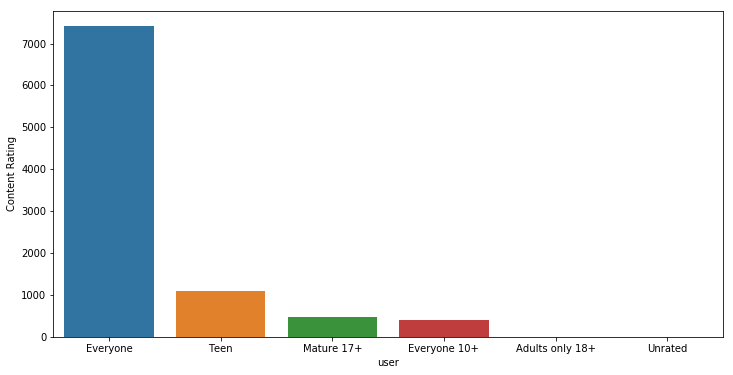

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(data=temp,x="user",y="Content Rating")

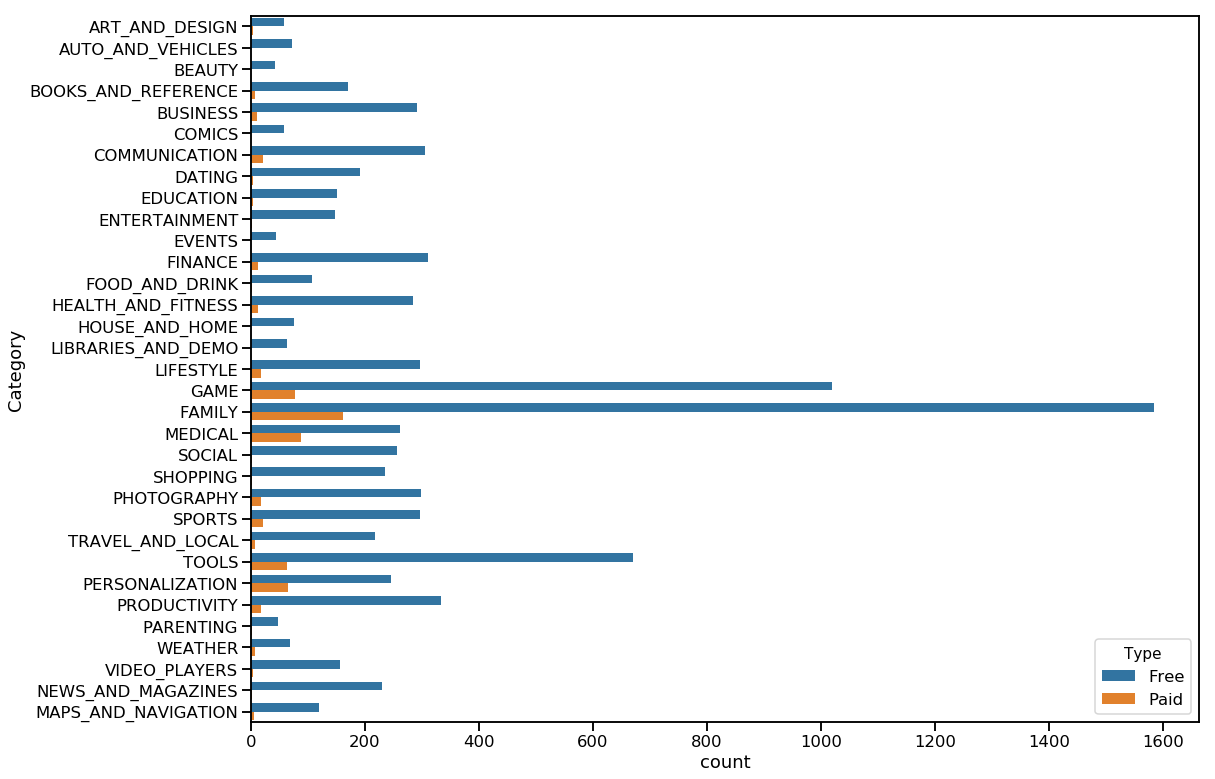

In [19]:
sns.set_context('talk',font_scale=1)
plt.figure(figsize=(17,13))
sns.countplot(data=data,y="Category",hue="Type")


Clearly, Medical and Family apps are the most expensive. Some medical apps extend even upto 80$.
All other apps are priced under 30$.
Surprisingly, all game apps are reasonably priced below 20$.

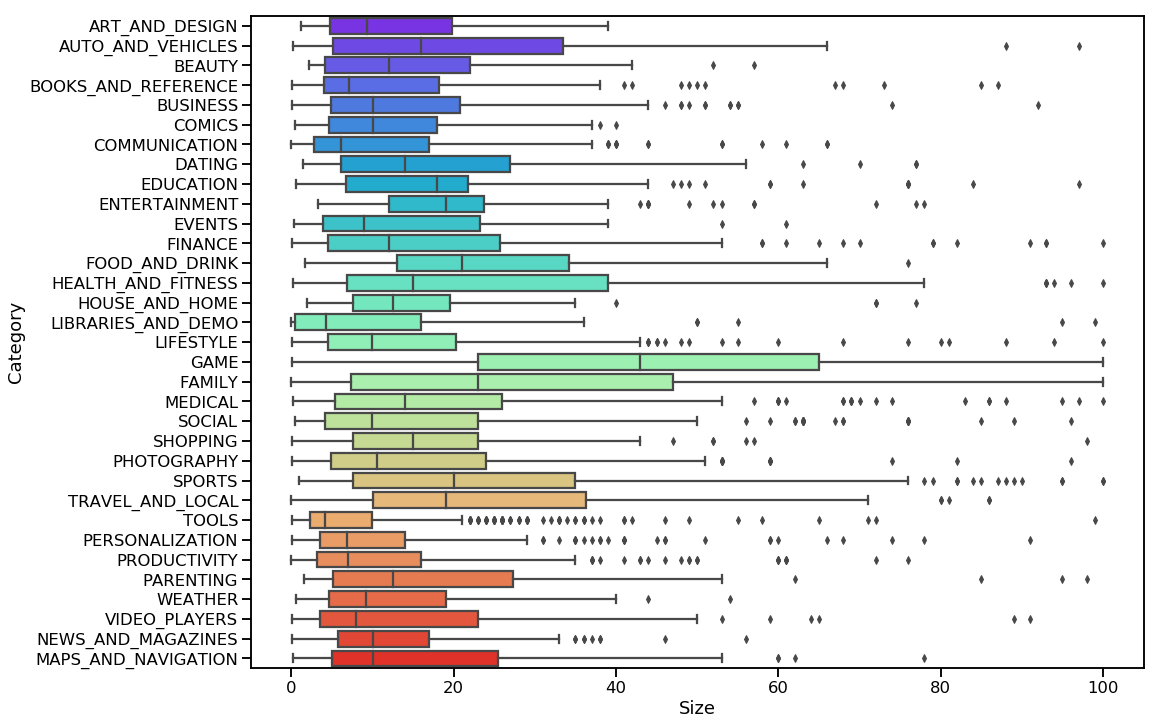

In [20]:
plt.figure(figsize=(16,12))
sns.boxplot(data=data,x="Size",y="Category",palette='rainbow')

Text(0.5, 0, 'no of apps')

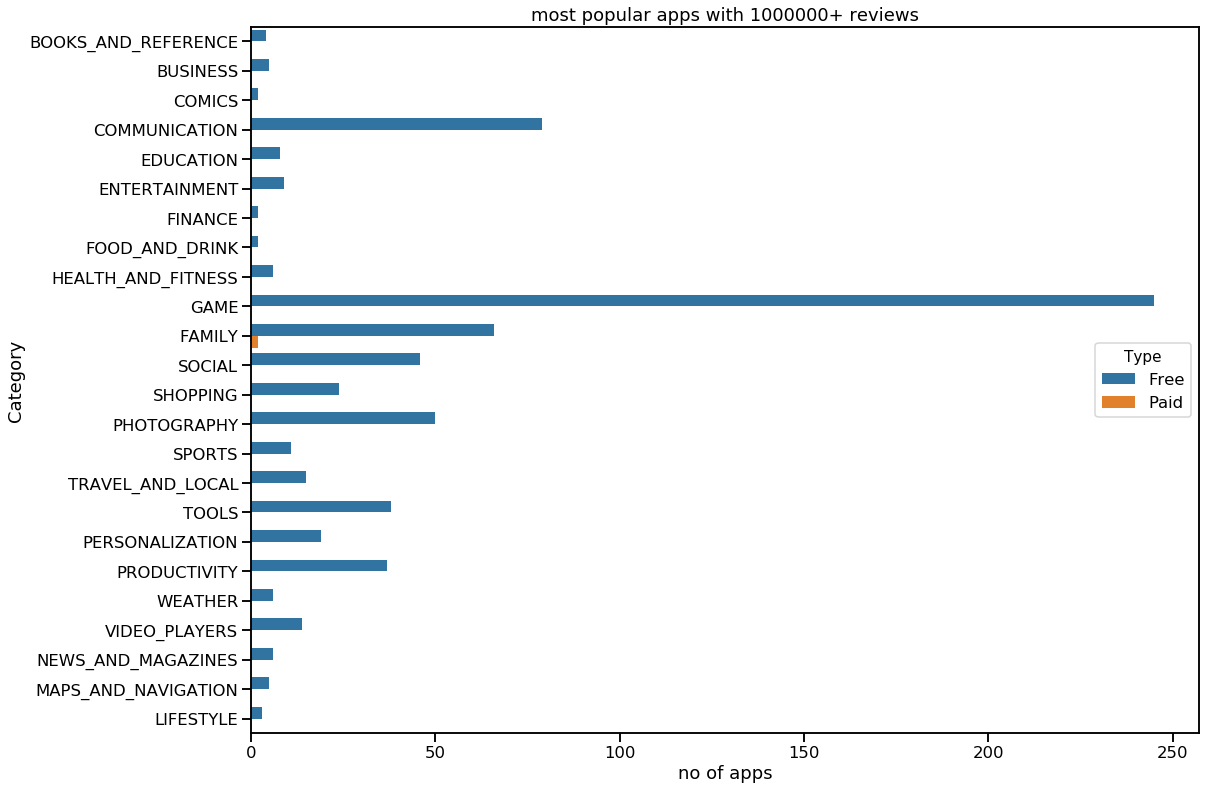

In [21]:
plt.figure(figsize=(17,13))
sns.countplot(data=data[data["Reviews"]>1000000],y="Category",hue="Type")
plt.title("most popular apps with 1000000+ reviews")
plt.xlabel("no of apps")

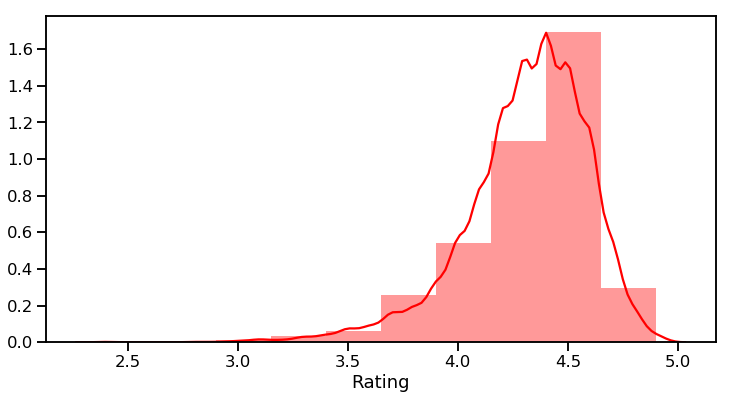

In [22]:
#most reviewed app rating
plt.figure(figsize=(12,6))
sns.distplot(data[data["Reviews"]>10000]["Rating"],bins=10,color="red")

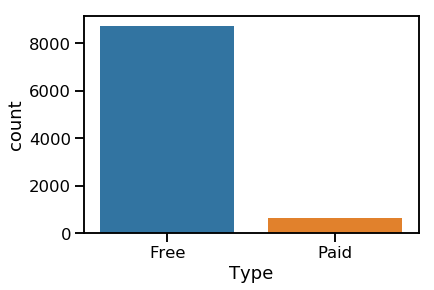

In [23]:
sns.countplot(x=data["Type"])

In [24]:
x=np.log(data["Installs"])
y=np.log(data["Reviews"])

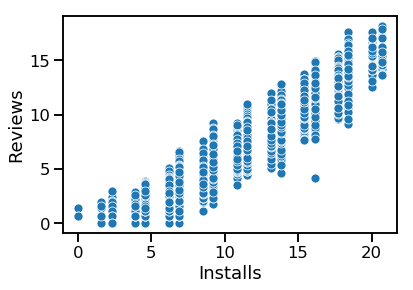

In [25]:
sns.scatterplot(x,y,data=data,palette="rainbow")

In [26]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [27]:
popular_apps = data[(data["Installs"]>100000) & (data["Rating"]>4.5)]

In [28]:
#the most popular paid apps with decent reviews and ratings
pd.DataFrame(popular_apps[popular_apps["Type"]=="Paid"][["App","Price"]])

,App,Price
853,Toca Life: City,277.0656
2151,Toca Life: City,277.0656
4034,Hitman Sniper,68.7456
4260,Cut the Rope GOLD,68.7456
5627,Five Nights at Freddy's 2,207.6256
5631,Five Nights at Freddy's,207.6256
6936,Hitman GO,68.7456
8449,Cameringo+ Filters Camera,207.6256
8804,DraStic DS Emulator,346.5056
8860,Bloons TD 5,207.6256


machine learning

In [29]:
mldata = data[["Reviews","Size","Installs","Price","Rating"]]
mldata.dropna(inplace=True)

X=mldata.iloc[:,0:-1].values
y = mldata.iloc[:,-1].values

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=300)

In [30]:
rfr.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
ypre = rfr.predict(xtest)

df=pd.DataFrame()

df["ytest"]=pd.Series(ytest)

df["ypre"] =pd.Series(ypre)
df.sample(10)

,ytest,ypre
1187,4.4,4.402000
1295,5.0,4.707500
901,4.4,4.401333
830,3.7,3.950333
248,4.2,4.261333
480,4.3,4.458000
643,4.2,3.884000
516,4.7,4.529000
958,4.0,4.136333
157,4.2,4.243000
